In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connect = sqlite3.connect('data.db')
cursor = connect.cursor()

In [3]:
res = pd.read_sql(
'''
SELECT *
FROM data
LIMIT 5;
''',connect)
res

,index,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,1,Responded,1
1,1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,0,Responded,0
2,2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,0,Responded,1
3,3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,1,Ignored,1
4,4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,0,Unsubscribed,0


### Customers count

In [4]:
res = pd.read_sql(
'''
SELECT 
    COUNT(DISTINCT Customer_ID) AS User_Count
FROM data;
''',connect)
res

,User_Count
0,1000


### Total spent by gender

In [5]:
res = pd.read_sql(
'''
SELECT 
    Gender,
    COUNT(*) AS Total_Customers,
    SUM(Total_Spend) AS Total_Spend
FROM data
GROUP BY Gender;
''',connect)
res

,Gender,Total_Customers,Total_Spend
0,Female,342,1794991.62
1,Male,334,1647955.34
2,Other,324,1637845.69


### Average spent by gender

In [6]:
res = pd.read_sql(
'''
SELECT 
    Gender,
    COUNT(*) AS Total_Customers,
    AVG(Total_Spend) AS Total_Spend
FROM data
GROUP BY Gender;
''',connect)
res

,Gender,Total_Customers,Total_Spend
0,Female,342,5248.513509
1,Male,334,4933.998024
2,Other,324,5055.079290


### Gender percentage

In [7]:
res = pd.read_sql(
'''
SELECT 
    ROUND(SUM(CASE WHEN Gender='Male' THEN 1 ELSE 0 END),4) AS Male,
    ROUND(SUM(CASE WHEN Gender='Female' THEN 1 ELSE 0 END),4) AS Female,
    ROUND(SUM(CASE WHEN Gender='Other' THEN 1 ELSE 0 END),4) AS Other
FROM data;
''',connect)

In [8]:
df = res.stack().astype(str).reset_index(level=1)
df.columns = ['Gender', 'Ratio']

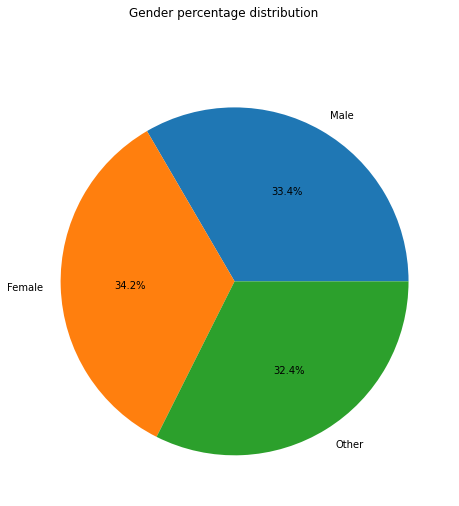

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df['Ratio'],labels = df['Gender'], autopct='%1.1f%%')
fig.suptitle('Gender percentage distribution')
plt.show()

### Gender income distribution
###### This is easier using simple seaborn

In [10]:
res = pd.read_sql(
'''
SELECT 
    Gender,
    Annual_Income
FROM data;
''',connect)

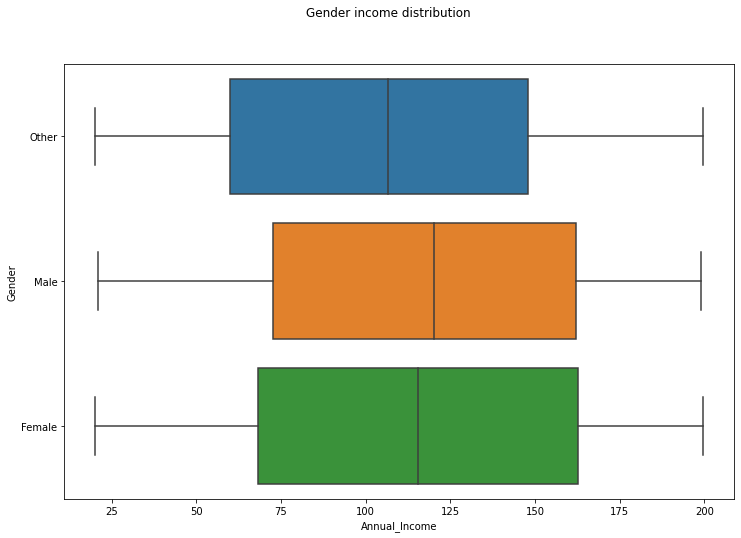

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Gender income distribution')
sns.boxplot(data=res, x="Annual_Income", y="Gender")
plt.show()

### Gender years as customer distribution
###### This is easier using simple seaborn

In [12]:
res = pd.read_sql(
'''
SELECT 
    Gender,
    Years_as_Customer
FROM data;
''',connect)

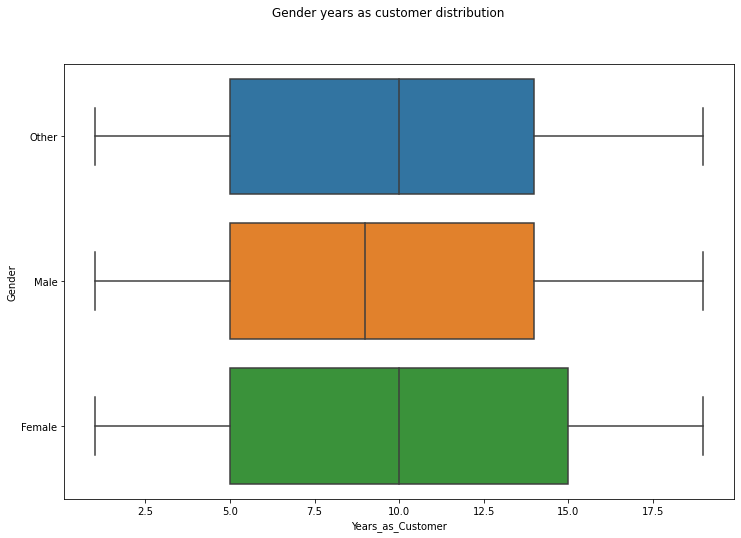

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Gender years as customer distribution')
sns.boxplot(data=res, x="Years_as_Customer", y="Gender")
plt.show()

### Gender age distribution
###### This is easier using simple seaborn

In [14]:
res = pd.read_sql(
'''
SELECT 
    Gender,
    Age
FROM data;
''',connect)

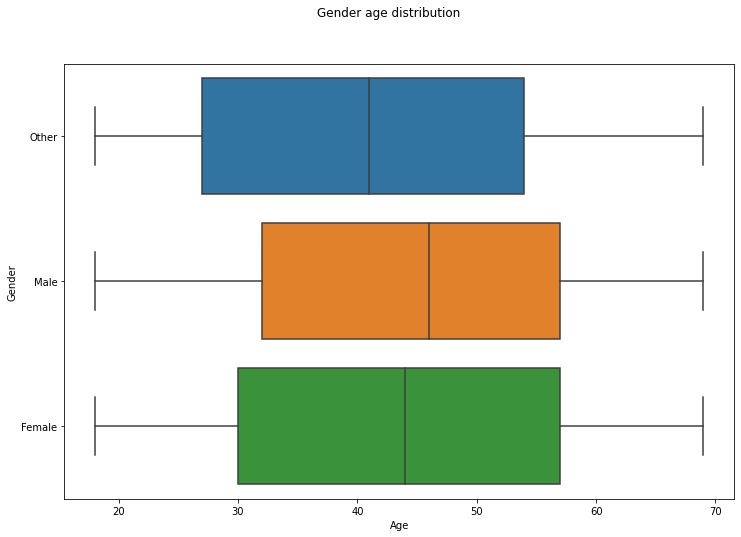

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Gender age distribution')
sns.boxplot(data=res, x="Age", y="Gender")
plt.show()

### Customers with most purchases and total spent

In [16]:
res = pd.read_sql(
'''
SELECT
    Customer_ID,
    SUM(Num_of_Purchases) AS Total_Purchases,
    SUM(Total_Spend) AS Total_Spent
FROM data
GROUP BY Customer_ID
ORDER BY Total_Purchases DESC
LIMIT 10;
''',connect)
res

,Customer_ID,Total_Purchases,Total_Spent
0,793,99,4302.65
1,643,99,1621.30
2,531,99,1139.41
3,522,99,9641.11
4,416,99,6684.31
5,183,99,9790.09
6,174,99,7511.69
7,124,99,631.26
8,796,98,2079.67
9,768,98,9374.94


### Customers who spent the most

In [17]:
res = pd.read_sql(
'''
SELECT
    Customer_ID,
    SUM(Total_Spend) AS Total_Spent
FROM data
GROUP BY Customer_ID
ORDER BY Total_Spent DESC
LIMIT 10;
''',connect)
res

,Customer_ID,Total_Spent
0,464,9999.64
1,551,9999.49
2,818,9978.79
3,369,9970.76
4,81,9961.39
5,337,9958.72
6,250,9934.71
7,49,9906.34
8,37,9905.49
9,646,9898.68


### Customers with highest average spending

In [18]:
res = pd.read_sql(
'''
SELECT
    Customer_ID,
    Average_Transaction_Amount
FROM data
ORDER BY Average_Transaction_Amount DESC
LIMIT 10;
''',connect)
res

,Customer_ID,Average_Transaction_Amount
0,132,499.57
1,371,498.82
2,651,498.26
3,540,498.10
4,554,497.57
5,151,497.43
6,207,497.07
7,967,496.82
8,168,494.48
9,446,494.07


### Other stats distributions

In [19]:
res = pd.read_sql(
'''
SELECT
    Num_of_Purchases,
    Num_of_Returns,
    Satisfaction_Score,
    Annual_Income
FROM data;
''',connect)
res

,Num_of_Purchases,Num_of_Returns,Satisfaction_Score,Annual_Income
0,22,2,3,45.15
1,77,2,3,79.51
2,71,5,2,29.19
3,33,5,5,79.63
4,43,3,5,77.66
...,...,...,...,...
995,29,0,2,143.72
996,90,6,4,164.19
997,69,7,1,113.31
998,31,1,5,72.98


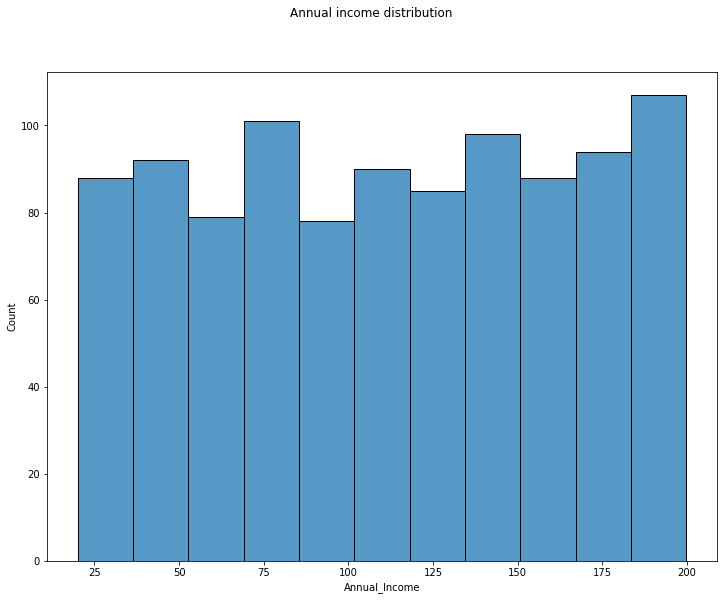

In [20]:
fig,ax = plt.subplots(figsize=(12,9))
fig.suptitle('Annual income distribution')
sns.histplot(data=res, x="Annual_Income")
plt.show()

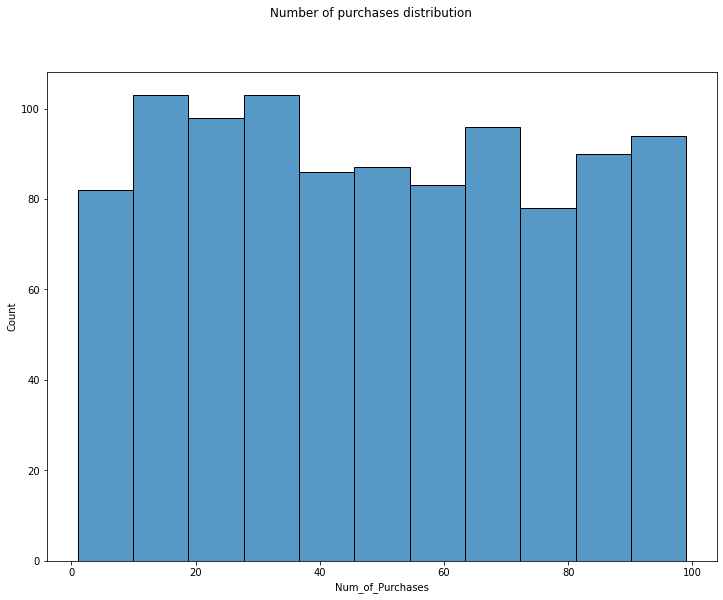

In [21]:
fig,ax = plt.subplots(figsize=(12,9))
fig.suptitle('Number of purchases distribution')
sns.histplot(data=res, x="Num_of_Purchases")
plt.show()

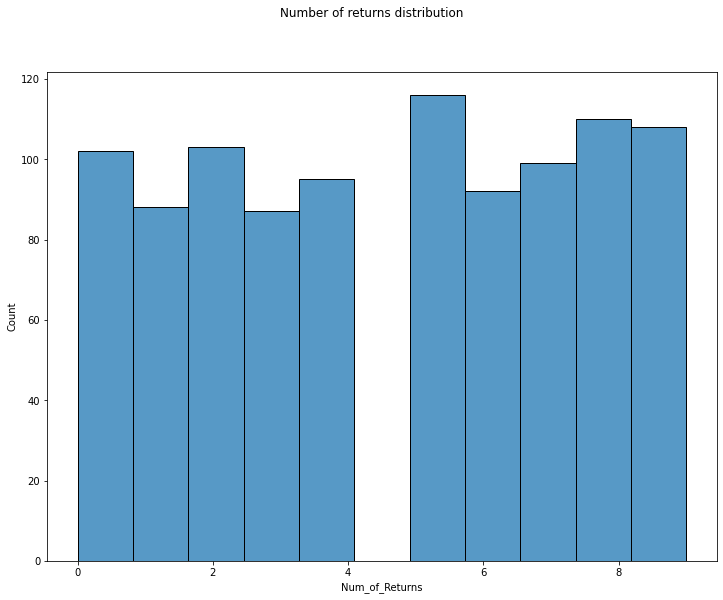

In [22]:
fig,ax = plt.subplots(figsize=(12,9))
fig.suptitle('Number of returns distribution')
sns.histplot(data=res, x="Num_of_Returns")
plt.show()

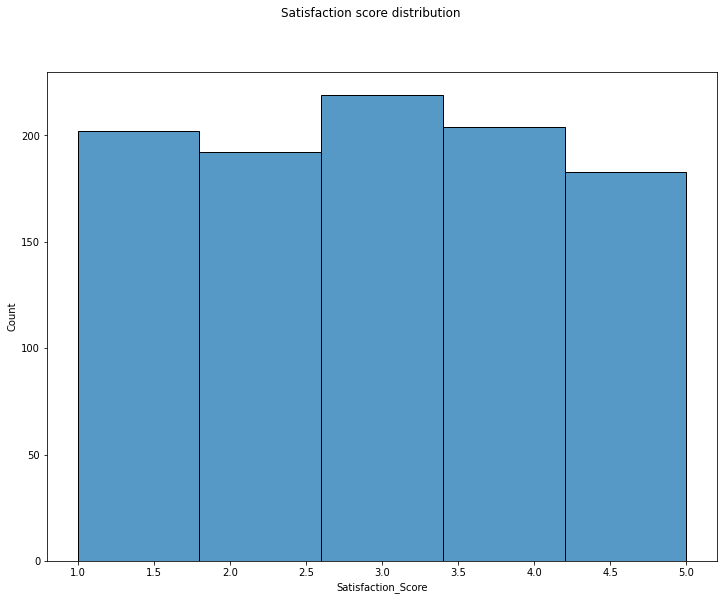

In [23]:
fig,ax = plt.subplots(figsize=(12,9))
fig.suptitle('Satisfaction score distribution')
sns.histplot(data=res, x="Satisfaction_Score",bins=5)
plt.show()

### Age distribution
###### This is easier using seaborn histplot but I will make it messy

In [24]:
res = pd.read_sql(
'''
WITH Ages AS (
    SELECT
     Age,
     CASE
      WHEN Age BETWEEN 10 and 15 THEN '10-15'
      WHEN Age BETWEEN 16 and 20 THEN '16-20'
      WHEN Age BETWEEN 21 and 25 THEN '21-25'
      WHEN Age BETWEEN 26 and 30 THEN '26-30'
      WHEN Age BETWEEN 31 and 35 THEN '31-35'
      WHEN Age BETWEEN 36 and 40 THEN '36-40'
      WHEN Age BETWEEN 41 and 45 THEN '41-45'
      WHEN Age BETWEEN 46 and 50 THEN '46-50'
      WHEN Age BETWEEN 51 and 55 THEN '51-55'
      WHEN Age BETWEEN 56 and 60 THEN '51-55'
      WHEN Age BETWEEN 61 and 65 THEN '56-60'
      WHEN Age BETWEEN 66 and 70 THEN '66-70'
      END AS Age_Bucket
    FROM data
)
SELECT
    Age_Bucket,
    COUNT(*) AS Count
FROM Ages
GROUP BY Age_Bucket;
''',connect)
res

,Age_Bucket,Count
0,16-20,57
1,21-25,114
2,26-30,95
3,31-35,84
4,36-40,92
5,41-45,100
6,46-50,91
7,51-55,193
8,56-60,90
9,66-70,84


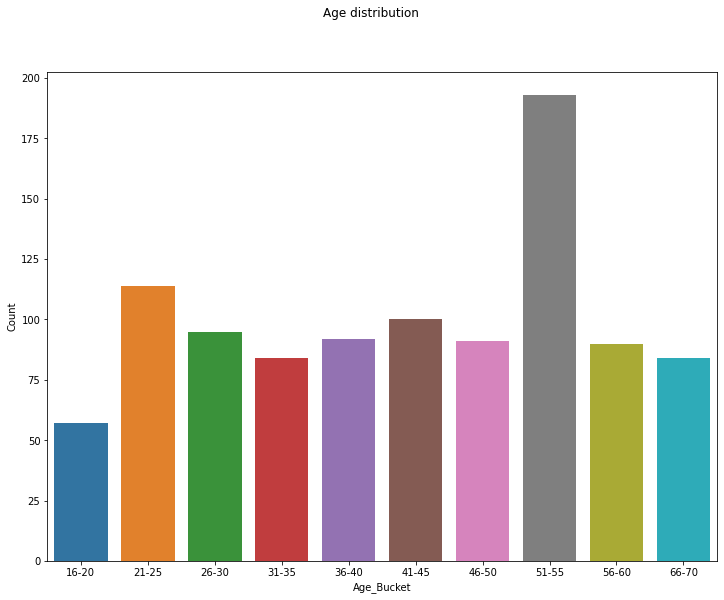

In [25]:
fig,ax = plt.subplots(figsize=(12,9))
fig.suptitle('Age distribution')
sns.barplot(data=res, x="Age_Bucket",y='Count')
plt.show()

In [26]:
res = pd.read_sql(
'''
WITH Ages AS (
    SELECT
     *,
     CASE
      WHEN Age BETWEEN 10 and 15 THEN '10-15'
      WHEN Age BETWEEN 16 and 20 THEN '16-20'
      WHEN Age BETWEEN 21 and 25 THEN '21-25'
      WHEN Age BETWEEN 26 and 30 THEN '26-30'
      WHEN Age BETWEEN 31 and 35 THEN '31-35'
      WHEN Age BETWEEN 36 and 40 THEN '36-40'
      WHEN Age BETWEEN 41 and 45 THEN '41-45'
      WHEN Age BETWEEN 46 and 50 THEN '46-50'
      WHEN Age BETWEEN 51 and 55 THEN '51-55'
      WHEN Age BETWEEN 56 and 60 THEN '51-55'
      WHEN Age BETWEEN 61 and 65 THEN '56-60'
      WHEN Age BETWEEN 66 and 70 THEN '66-70'
      END AS Age_Bucket
    FROM data
)
SELECT
    Age_Bucket,
    Annual_Income,
    Years_as_Customer,
    Total_Spend
FROM Ages
ORDER BY Age_Bucket ASC;
''',connect)

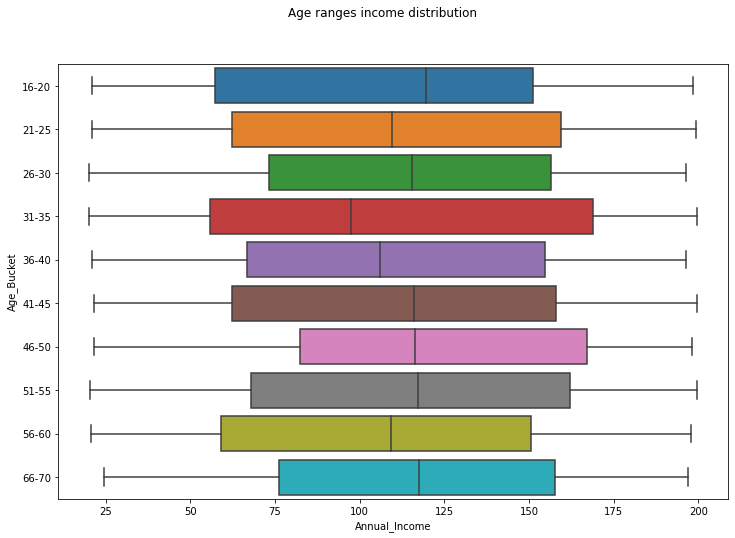

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Age ranges income distribution')
sns.boxplot(data=res, x="Annual_Income", y="Age_Bucket")
plt.show()

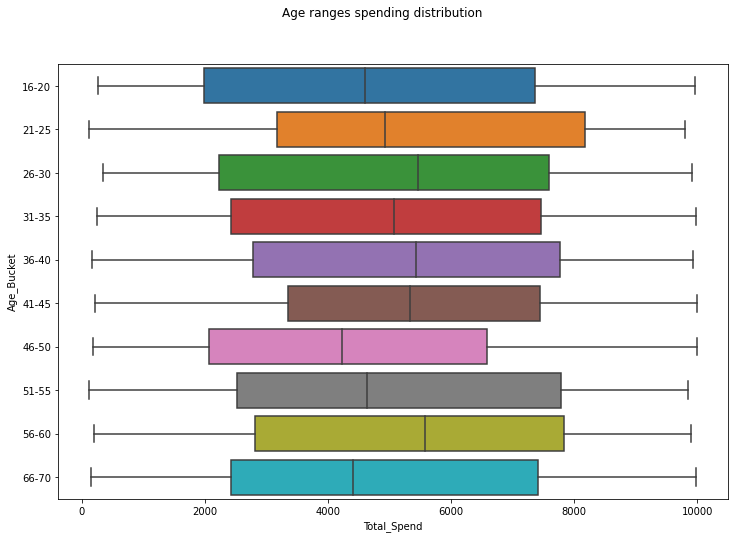

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Age ranges spending distribution')
sns.boxplot(data=res, x="Total_Spend", y="Age_Bucket")
plt.show()

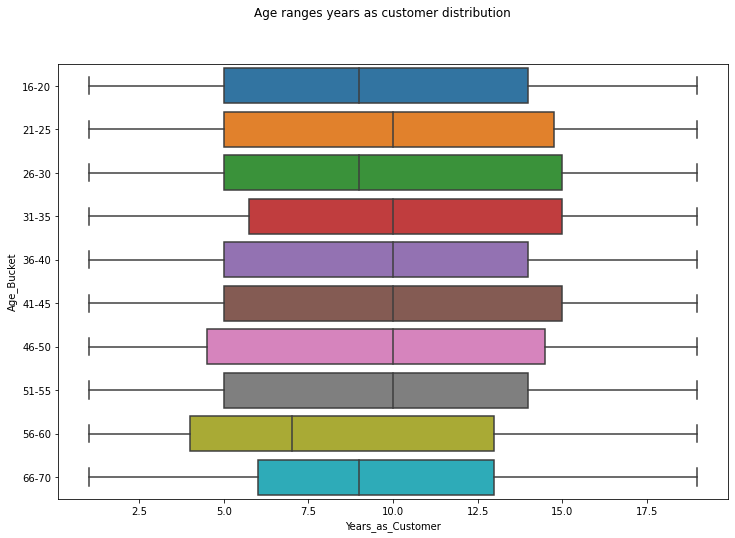

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Age ranges years as customer distribution')
sns.boxplot(data=res, x="Years_as_Customer", y="Age_Bucket")
plt.show()

In [30]:
## There is people under 20 who have been customers for 10+ years!?

In [31]:
res = pd.read_sql(
'''
SELECT
    Years_as_Customer,
    Age
FROM data
WHERE Age BETWEEN 10 AND 20 AND Years_as_Customer > 10;
''',connect)

In [32]:
res

,Years_as_Customer,Age
0,13,18
1,18,18
2,16,19
3,12,18
4,14,20
5,16,20
6,19,19
7,19,20
8,16,18
9,14,18
